In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Import the dataset and begin to clean it.

In [2]:
# Load the dataset
df = pd.read_csv("house-prices-data/train.csv")

# Read the head of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.shape)

(1460, 81)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'SalePrice']]

In [8]:
df.isnull().sum() 

LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
1stFlrSF          0
2ndFlrSF          0
TotRmsAbvGrd      0
Fireplaces        0
SalePrice         0
dtype: int64

In [9]:
df.loc[:, 'LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [10]:
df.isnull().sum() 

LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
1stFlrSF        0
2ndFlrSF        0
TotRmsAbvGrd    0
Fireplaces      0
SalePrice       0
dtype: int64

<Axes: >

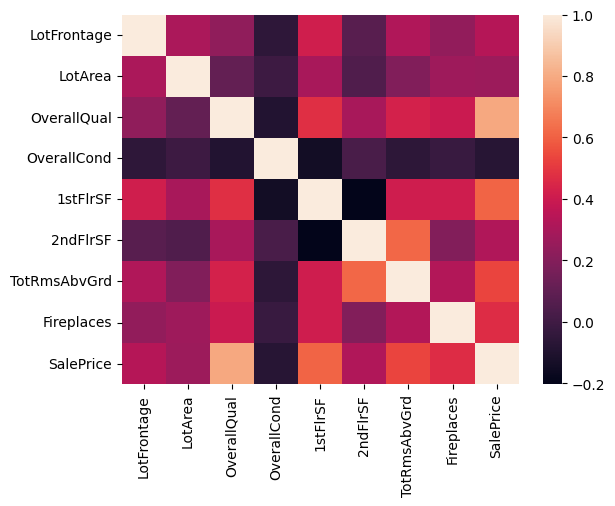

In [12]:
sns.heatmap(df.corr())

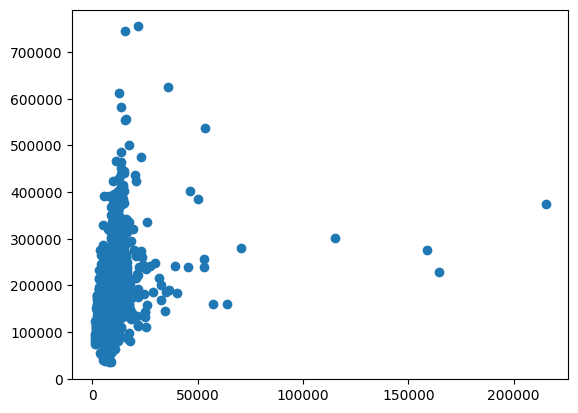

In [15]:
plt.scatter(df['LotArea'],df['SalePrice'])

In [14]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,SalePrice
0,65.0,8450,7,5,856,854,8,0,208500
1,80.0,9600,6,8,1262,0,6,1,181500
2,68.0,11250,7,5,920,866,6,1,223500
3,60.0,9550,7,5,961,756,7,1,140000
4,84.0,14260,8,5,1145,1053,9,1,250000


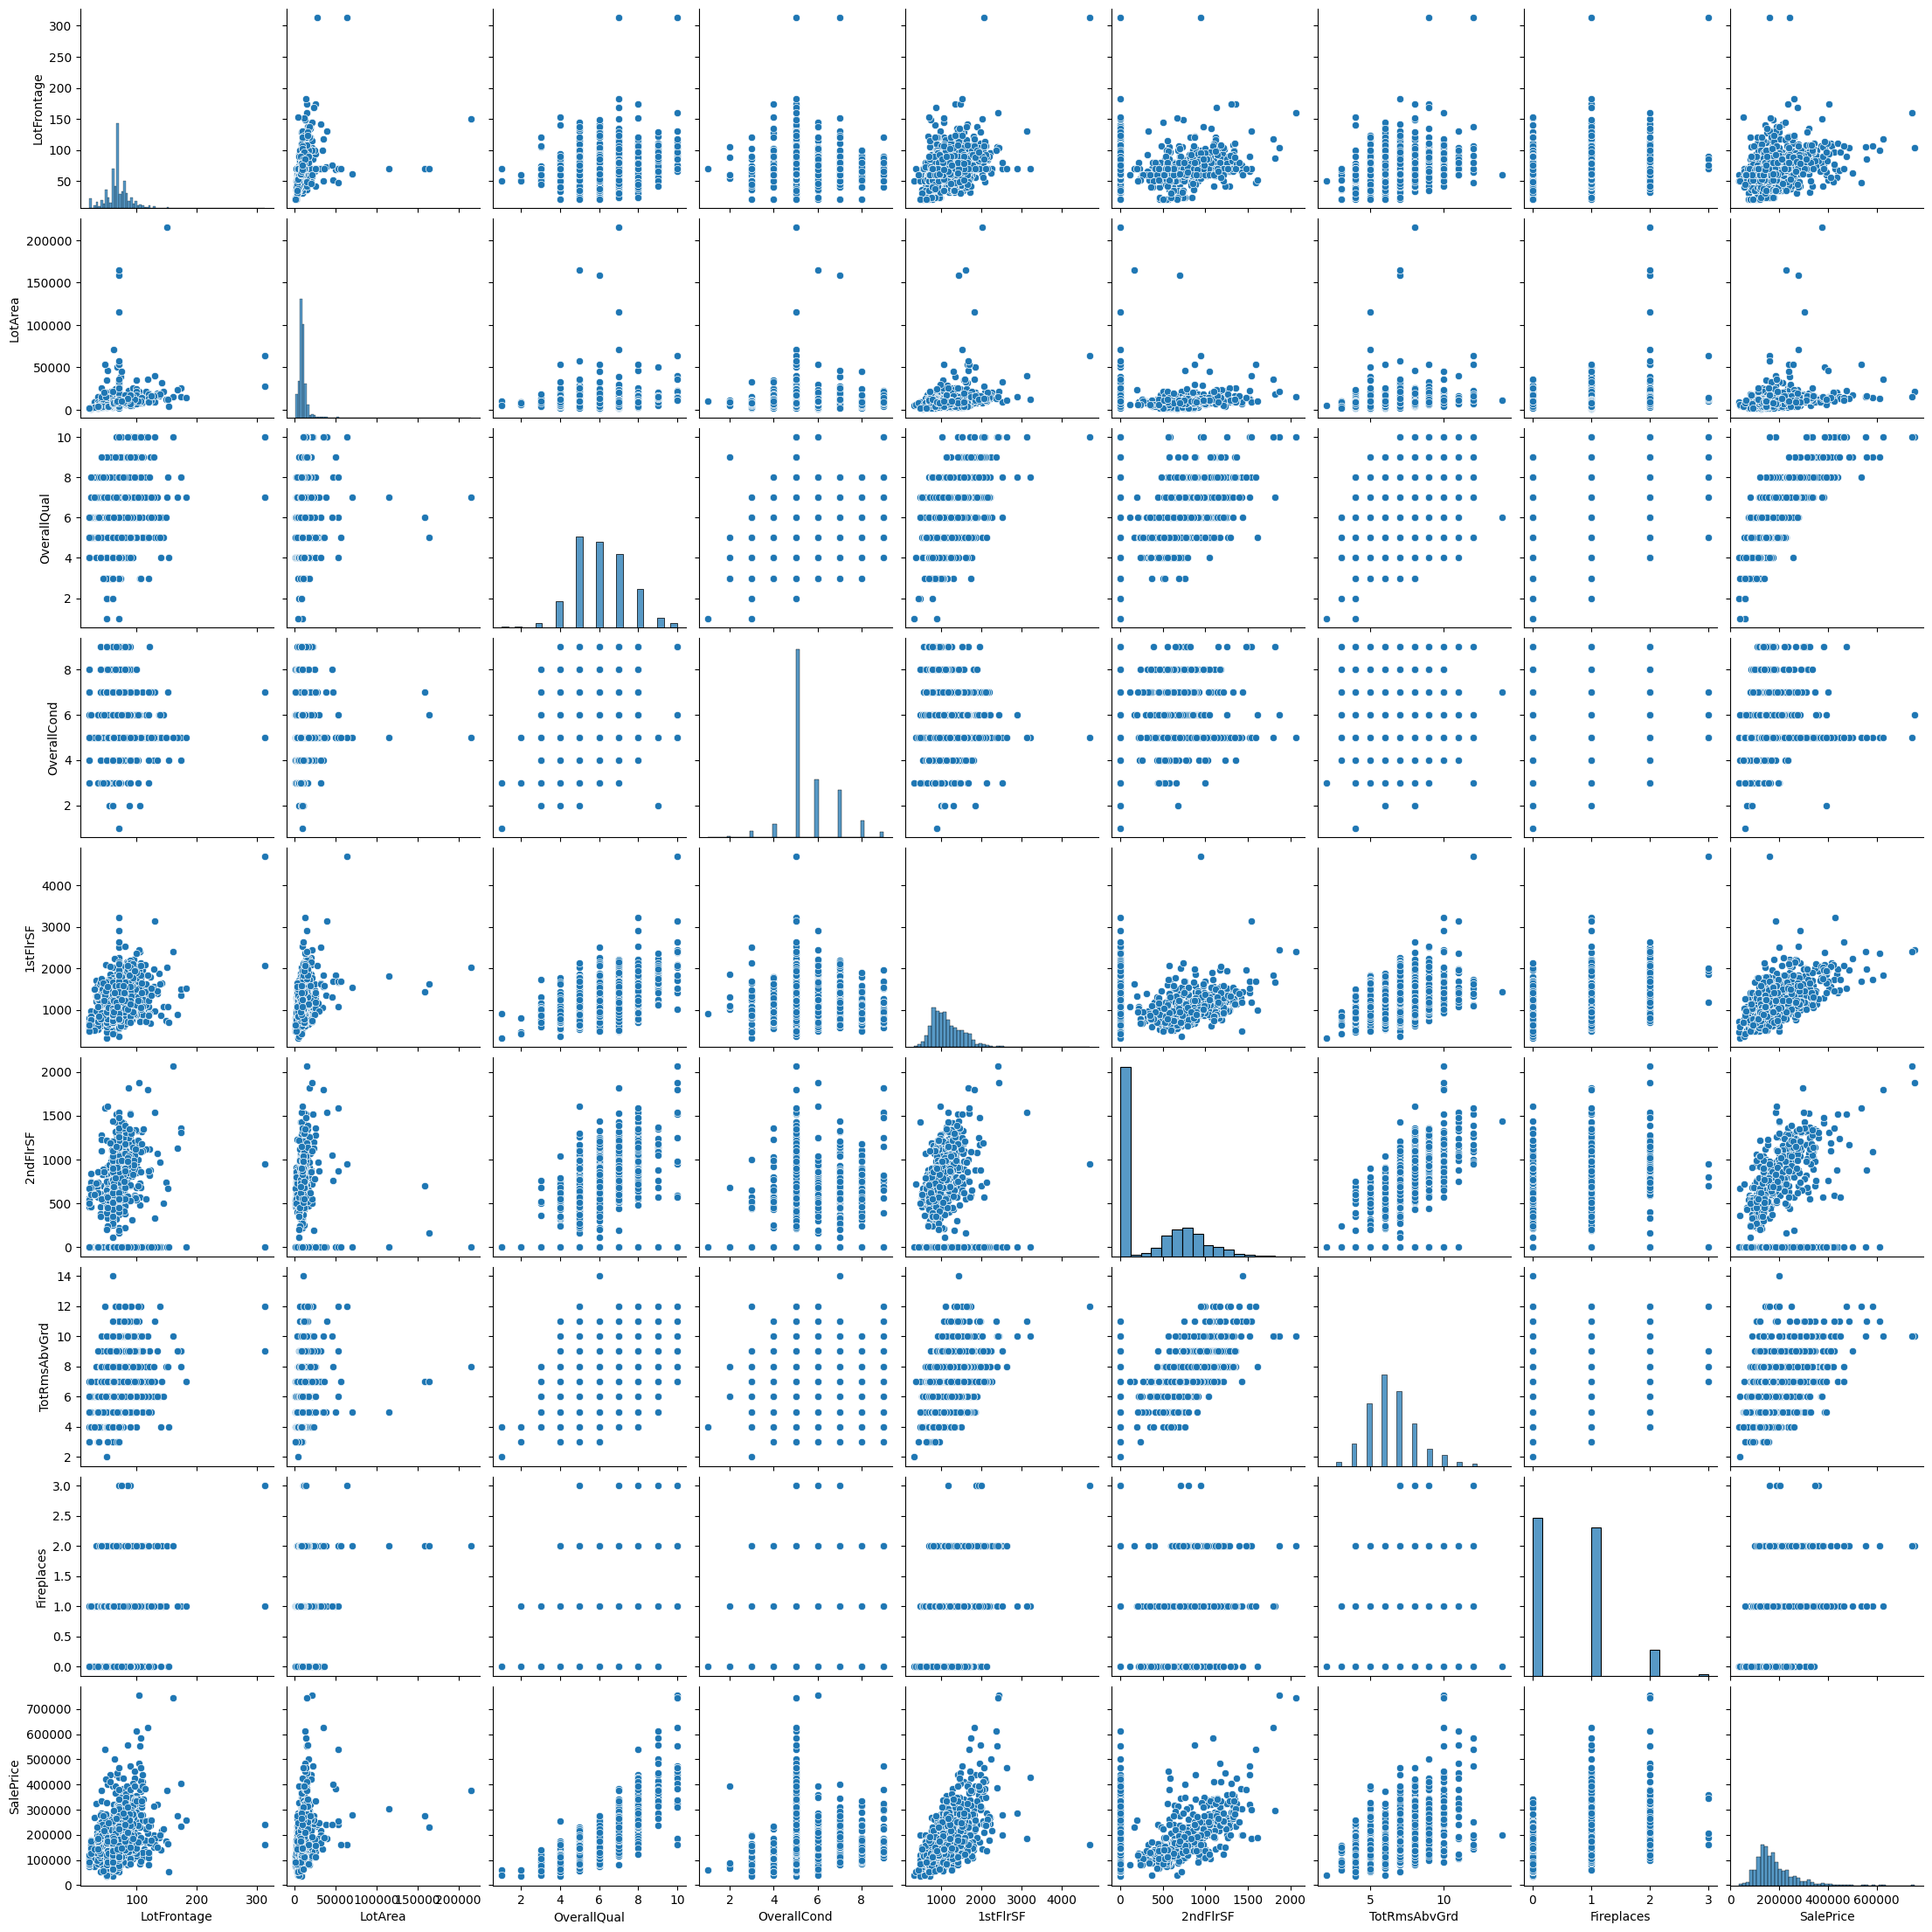

In [17]:
sns.pairplot(df)

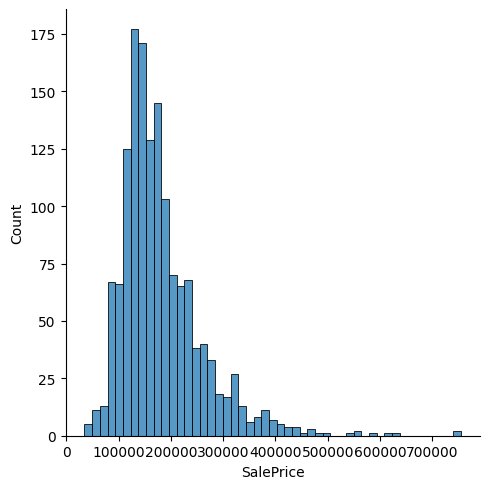

In [19]:
sns.displot(df['SalePrice'])

In [20]:
X = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces']]
y = df['SalePrice']

In [21]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

## Train Model


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Columns need which transformation

# Columns that need Power Transformation (e.g., LotArea)
# You might also consider LotFrontage if it's very skewed, but let's start with LotArea
skewed_features = ['LotArea']

# Columns that only need Standard Scaling
# This includes LotFrontage, OverallQual, OverallCond, 1stFlrSF
# Make sure to exclude any features that are already one-hot encoded or handled otherwise
numerical_features_to_scale = ['LotFrontage','OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces']


# Create a ColumnTransformer
# It allows different transformers to be applied to different columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', PowerTransformer(method='yeo-johnson'), skewed_features), # Apply Yeo-Johnson to skewed
        ('scaler', StandardScaler(), numerical_features_to_scale) # Apply StandardScaler to others
    ],
    remainder='passthrough' # Keep any other columns not specified (e.g., if you have categorical ones not listed)
)

In [46]:
# Create a pipeline that first preprocesses the data and then trains a Linear Regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Our ColumnTransformer for preprocessing
    ('regressor', LinearRegression()) # Your chosen model
])

# Now, train the model using the pipeline
# The pipeline will automatically:
# 1. Apply PowerTransformer (Yeo-Johnson) to 'LotArea' (and any other specified skewed features)
# 2. Apply StandardScaler to 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF'
# 3. Fit the Linear Regression model on the transformed data
model_pipeline.fit(X_train, y_train_transformed)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_transform', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Performance Evaluation


Mean Squared Error (MSE): 917234647.90
Root Mean Squared Error (RMSE): 30285.88
R-squared (R2): 0.8573


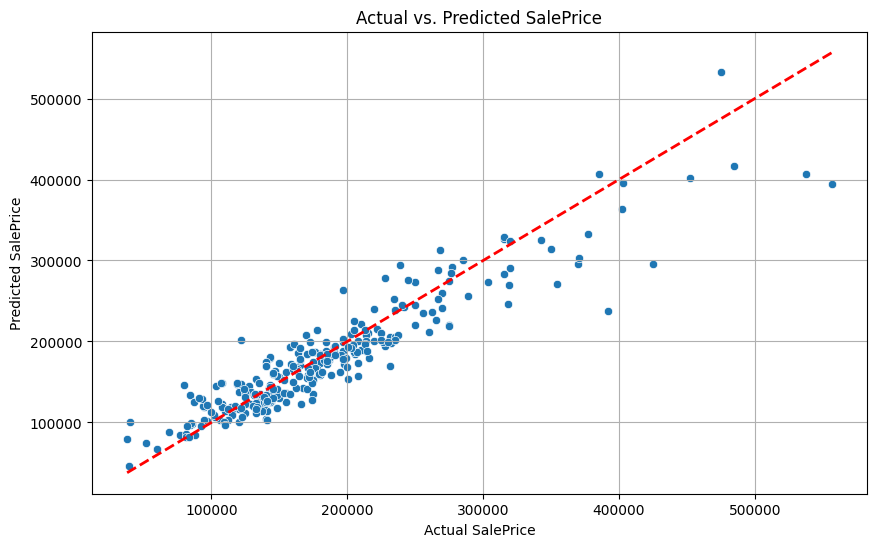

In [47]:
# Make predictions on the test set
y_pred_transformed = model_pipeline.predict(X_test)

# Inverse transform the predictions back to the original SalePrice scale (dollars)
y_pred = np.expm1(y_pred_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.grid(True)
plt.show()

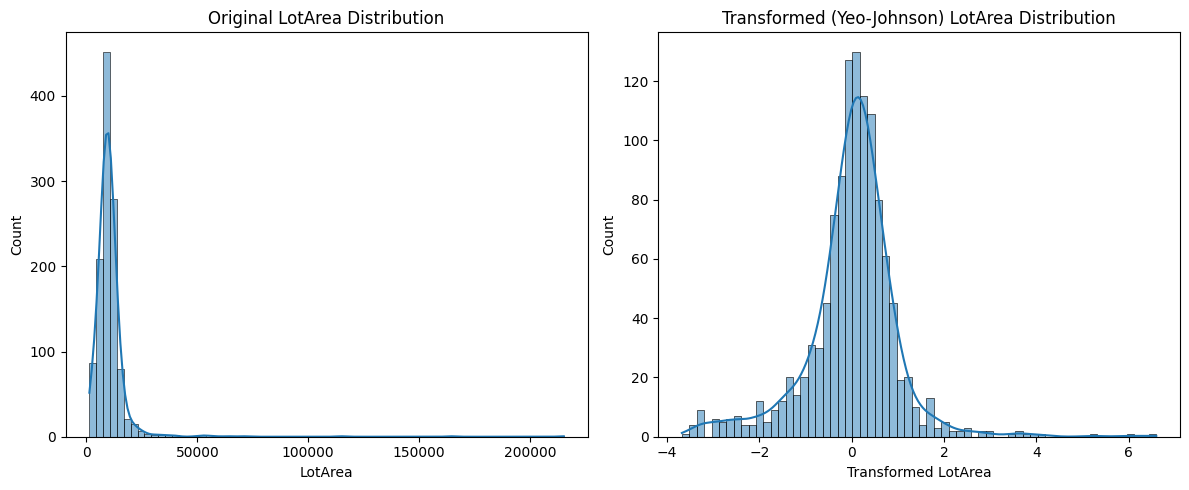

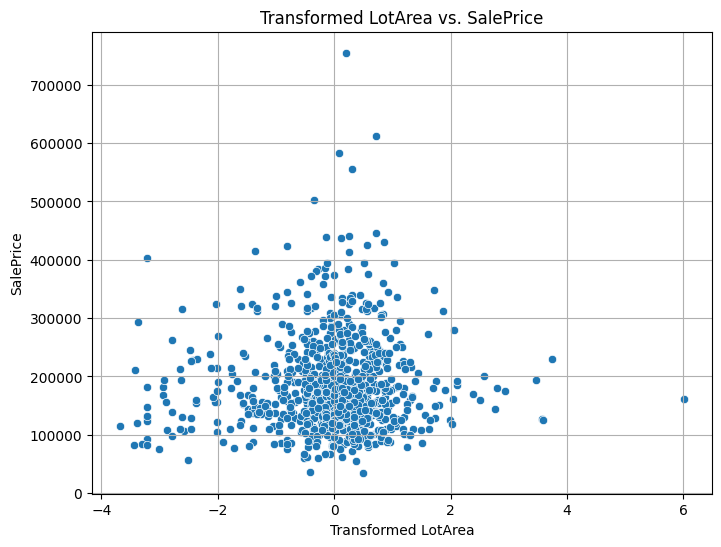

In [41]:
# To inspect the transformed data:
# You can get the transformed training data by applying the preprocessor
X_train_transformed = model_pipeline.named_steps['preprocessor'].transform(X_train)

# Convert back to DataFrame for easy plotting, making sure column order is maintained
# The order of columns in X_train_transformed will be:
# [transformed skewed_features, scaled numerical_features_to_scale, passthrough_features]
transformed_feature_names = (
    skewed_features + numerical_features_to_scale # + names of any 'remainder' passthrough columns
)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)

# Plot the distribution of the transformed LotArea
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['LotArea'], kde=True)
plt.title("Original LotArea Distribution")
plt.xlabel("LotArea")

plt.subplot(1, 2, 2)
sns.histplot(X_train_transformed_df['LotArea'], kde=True)
plt.title("Transformed (Yeo-Johnson) LotArea Distribution")
plt.xlabel("Transformed LotArea")

plt.tight_layout()
plt.show()

# You can also replot LotArea vs SalePrice with the transformed LotArea
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_transformed_df['LotArea'], y=y_train)
plt.title("Transformed LotArea vs. SalePrice")
plt.xlabel("Transformed LotArea")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()